In [0]:
!pip install -q keras

In [0]:

import keras

from keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:

import pandas as pd
import numpy as np
import cv2

In [0]:
from google.colab.patches import cv2_imshow
for i in range(0,9):
  random_num=np.random.randint(0,len(x_train))
  img=x_train[random_num]
  window_name='Random sample #'+str(i)
  cv2_imshow(img)
  cv2.waitKey(3)

cv2.destroyAllWindows()



In [0]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

In [0]:
print(img_rows)

28


In [0]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [0]:
input_shape=(img_rows,img_cols,1)

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


In [0]:
x_train /= 255
x_test /= 225

In [0]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [0]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
num_pixels=y_train.shape[1] * x_train.shape[2]


In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
num_classes

10

In [0]:
num_pixels

280

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 32s 536us/step - loss: 0.5820 - acc: 0.8157 - val_loss: 0.1996 - val_acc: 0.9372
Epoch 2/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2990 - acc: 0.9100 - val_loss: 0.1425 - val_acc: 0.9573
Epoch 3/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.2340 - acc: 0.9298 - val_loss: 0.1095 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.1824 - acc: 0.9458 - val_loss: 0.0838 - val_acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1494 - acc: 0.9558 - val_loss: 0.0724 - val_acc: 0.9767
Epoch 6/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.1300 - acc: 0.9609 - val_loss: 0.0609 - val_acc: 0.9802
Epoch 7/10
600

In [0]:
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss',score[0])
print('test acc',score[1])

test loss 0.04295460095513263
test acc 0.9867


In [0]:
model.save('MNIST-weights.h5')

[9]


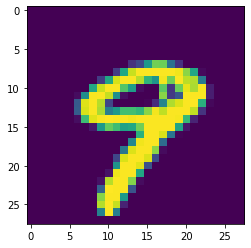

In [0]:
i=9
import matplotlib.pyplot as plt
predicted=model.predict(x_test)
while i <= 9:
    pred=x_test[i][:,:,0]

    g = plt.imshow(pred)
    pre=x_test[i]
    pre=pre.reshape(1,28,28,1)
    res=str(model.predict_classes(pre,1,verbose=0))
    print(res)
    i += 1
    
    